# Azure OpenAI Configuration

Add your [Azure Open AI Service key](https://learn.microsoft.com/azure/cognitive-services/openai/quickstart?pivots=programming-language-studio) settings to a `.env` file in the same folder:

```
AZURE_OPENAI_API_KEY="..."
AZURE_OPENAI_ENDPOINT="https://..."
AZURE_OPENAI_DEPLOYMENT_NAME="..."
```

and add Azure OpenAI Text Completion to the kernel

## Semantic Kernel version: semantic-kernel    0.3.1.dev0

In [1]:
import os
from dotenv import load_dotenv
# load AZURE_OPENAI_ENDPOINT, AZURE_OPENAI_API_KEY, OPENAI_API_VERSION and AZURE_OPENAI_API_TYPE
# plus COMPLETION4_DEPLOYMENT, to be assigned to the MODEL string
# plus BING_SUBSCRIPTION_KEY and BING_SEARCH_URL

load_dotenv("./../credentials_my.env")
os.environ["AZURE_OPENAI_ENDPOINT"] = os.environ["AZURE_OPENAI_ENDPOINT_CA"]
os.environ["AZURE_OPENAI_API_KEY"] = os.environ["AZURE_OPENAI_API_KEY_CA"]

MODEL = os.environ["GPT4-1106-128k"] 

from langchain.chat_models import AzureChatOpenAI
from langchain.embeddings import AzureOpenAIEmbeddings

llm = AzureChatOpenAI(deployment_name=MODEL, temperature=0, max_tokens=1000)
embeddings_model_2_model       = AzureOpenAIEmbeddings(deployment=os.environ["EMBEDDING_ADA_002"])
embeddings_model_3_small_model = AzureOpenAIEmbeddings(deployment=os.environ["EMBEDDING_ADA_003_SMALL"])
embeddings_model_3_large_model = AzureOpenAIEmbeddings(deployment=os.environ["EMBEDDING_ADA_003_LARGE"])

In [2]:
for m in (embeddings_model_2_model, embeddings_model_3_small_model, embeddings_model_3_large_model):
    embeddings = m.embed_query("anatine amigos")
    print(f"Embeddings in ({m.deployment}): {len(embeddings)}. First elements: {[round(embeddings[i],3) for i in [0,1,2,-1]]}")    

Embeddings in (text-embedding-ada-002): 1536. First elements: [-0.027, -0.001, 0.02, -0.023]
Embeddings in (text-embedding-3-small): 1536. First elements: [0.016, -0.026, 0.025, 0.02]
Embeddings in (text-embedding-3-large): 3072. First elements: [-0.06, 0.005, -0.006, 0.007]


# Choose your model

In [3]:
model = embeddings_model_3_small_model

# Calculate Word Embeddings
To use word embeddings for semantic search, you first compute the embeddings for a corpus of text using a word embedding algorithm. What does this mean? We are going to create a numerical representation of each of these words. To perform this computation, we'll use OpenAI's 'get_embedding' function.

Since we have our words in a pandas dataframe, we can use "apply" to apply the get_embedding function to each row in the dataframe. We then store the calculated word embeddings in a new text file called "word_embeddings.csv" so that we don't have to call OpenAI again to perform these calculations.

# Learn how to generate embeddings with Azure OpenAI
https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/embeddings?tabs=console

In [5]:
import numpy as np
embeddings = model.embed_query("rabbit")
print(f"embeddings shape: {np.array(embeddings).shape}. Now showing the first 5 elements:\n{embeddings}")

embeddings shape: (1536,). Now showing the first 5 elements:
[0.006287489164684206, -0.01569809970436142, 0.00012310176833622087, 0.020742232238257836, -0.017206624364540866, -0.025904219920149133, -0.002035920766388742, 0.08678738880940699, 0.003653461391897321, -0.02332322701052607, 0.005271002250236546, 0.011025203529200429, -0.004534417354155726, -0.003898007610923766, -0.019363345819434028, -0.015533103801020213, -0.023228943637188238, -0.005518494708264475, -0.04629289416500303, 0.05157273326959885, 0.03372969892899538, -0.01820838101530369, 0.006263918787011041, -0.01791374593928426, 0.008544385539595582, 0.021378642214320443, -0.0027415692216313944, 0.007672268992833567, 0.014437065639564728, 0.018279092613984478, 0.02076580401291488, -0.04327584111935379, 0.004575666097160381, -0.017406976067222465, -0.008933303057630258, 0.03573321223052103, -0.006352308751023318, -0.06552659801779108, -0.018102312685959923, 0.014354568153555418, -0.011696969304603429, -0.015485963045673883, 

# Cosine similarity
https://en.wikipedia.org/wiki/Cosine_similarity
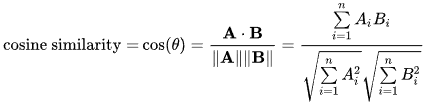

In [6]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
numerator = np.dot(v1,v2) # 4+10+18
numerator

32

In [7]:
denominator_1 = np.linalg.norm(v1) # sqrt (1+4+9) = 3.74
denominator_2 = np.linalg.norm(v2) # sqrt (16+25+36) = 8.77
denominator   = denominator_1 * denominator_2
denominator

32.83291031876401

In [8]:
print(numerator / denominator)

0.9746318461970762


In [10]:
def cosine_similarity(v1,v2):
    numerator = np.dot(v1,v2)
    denumerator = np.linalg.norm(v1) * np.linalg.norm(v2)
    return numerator / denumerator

cosine_similarity(np.array([1,2,3]),np.array([-4,5,6]))

0.7309738846478072

In [11]:
cosine_similarity(np.array([1,2,3,-1,2,3,-1,2,3,-1,2,3]),np.array([-4,5,6,4,5,-6,4,5,-6,4,5,6]))

0.1827434711619518

## Create an embedding for a single word

In [12]:
#openai.Embedding.create(input="rabbit", engine=azure_openai_deployment_emb)['data'][0]['embedding']
model.embed_query("rabbit")

[0.006220409208091641,
 -0.015751302310958927,
 0.00014615900063355198,
 0.02062866845780919,
 -0.017247498110634595,
 -0.025918372088432912,
 -0.0020646338906755704,
 0.08685010709484561,
 0.003693368069167819,
 -0.023409001631286248,
 0.0053456640104086435,
 0.010997636291653606,
 -0.004579894264640427,
 -0.003931934962429604,
 -0.0193445310840078,
 -0.015503899261901306,
 -0.023232286897272737,
 -0.005510599376447057,
 -0.04622894918214037,
 0.05155399836727002,
 0.03378813355992483,
 -0.01821354598297941,
 0.006285205045180466,
 -0.01790723957478825,
 0.008547171987608218,
 0.021429780964115595,
 -0.0027582449958785927,
 0.007698934558820794,
 0.014455382775214702,
 0.018307795827941453,
 0.020793603823847605,
 -0.04326012004402955,
 0.004609346875529776,
 -0.017353527323571732,
 -0.00899485316324244,
 0.035743791765854974,
 -0.006291095660490593,
 -0.06559704272738869,
 -0.01809573553942202,
 0.01436113386157524,
 -0.011680939285725193,
 -0.01546855557004054,
 0.02441039319549183,

## Check distance between two words

In [14]:
v1 = model.embed_query("rabbit")
v2 = model.embed_query("elephant") # elephant

cosine_similarity(v1,v2)

0.33996829428212877

# Read Data File Containing Words
Now that we have configured OpenAI, let's start with a simple CSV file with familiar words

In [15]:
import pandas as pd
file_name = 'words'
df = pd.read_csv(f'{file_name}.csv')
print(df)

            text
0            red
1       potatoes
2           soda
3         cheese
4          water
5           blue
6         crispy
7      hamburger
8         coffee
9          green
10          milk
11      la croix
12        yellow
13     chocolate
14  french fries
15         latte
16          cake
17         brown
18  cheeseburger
19      espresso
20    cheesecake
21         black
22         mocha
23         fizzy
24        carbon
25        banana


In [16]:
try:    
    #df["text_embeddings"] = df["text"].apply(lambda x: openai.Embedding.create(input=x, engine=azure_openai_deployment_emb)['data'][0]['embedding'])
    df["text_embeddings"] = df["text"].apply(lambda x: model.embed_query(x))
    df.to_pickle(f"{file_name}_enriched.pkl") # type(df['embeddings'][0][0]) --> float  
except:
    #print('switching to pickle file...')
    df = pd.read_pickle(f"{file_name}_enriched.pkl")

df

,text,text_embeddings
0,red,"[-0.022114495257041077, -0.010901302316900204,..."
1,potatoes,"[-0.025340150955405753, -0.04163414225697604, ..."
2,soda,"[0.018451469812164247, -0.025056717131703536, ..."
3,cheese,"[0.009347907430905588, -0.04612087538988089, 0..."
4,water,"[0.003019678551677416, 0.017477955162304423, -..."
5,blue,"[-0.0011808430795101673, -0.016510002016218404..."
6,crispy,"[-0.024546355445772553, -0.008117077400618284,..."
7,hamburger,"[-0.046422997340672234, -0.056433765438318836,..."
8,coffee,"[-0.010105199996597643, 0.003740026107236905, ..."
9,green,"[0.006235065684651073, -0.0011298545533220564,..."


In [19]:
search_term = input ('Insert a search term:\n') # "hot dog", "torta"...

#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = model.embed_query(search_term)
df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df

Insert a search term:
hot dog


,text,text_embeddings,similarity
0,red,"[-0.022114495257041077, -0.010901302316900204,...",0.224232
1,potatoes,"[-0.025340150955405753, -0.04163414225697604, ...",0.339883
2,soda,"[0.018451469812164247, -0.025056717131703536, ...",0.310918
3,cheese,"[0.009347907430905588, -0.04612087538988089, 0...",0.358563
4,water,"[0.003019678551677416, 0.017477955162304423, -...",0.257221
5,blue,"[-0.0011808430795101673, -0.016510002016218404...",0.227511
6,crispy,"[-0.024546355445772553, -0.008117077400618284,...",0.332168
7,hamburger,"[-0.046422997340672234, -0.056433765438318836,...",0.595376
8,coffee,"[-0.010105199996597643, 0.003740026107236905, ...",0.301569
9,green,"[0.006235065684651073, -0.0011298545533220564,...",0.227243


In [20]:
df.sort_values("similarity", ascending=False)

,text,text_embeddings,similarity
7,hamburger,"[-0.046422997340672234, -0.056433765438318836,...",0.595376
18,cheeseburger,"[-0.025501776988516474, -0.05675395275309322, ...",0.464040
14,french fries,"[-0.038529570589650564, -0.016472970829067433,...",0.360245
3,cheese,"[0.009347907430905588, -0.04612087538988089, 0...",0.358563
1,potatoes,"[-0.025340150955405753, -0.04163414225697604, ...",0.339883
6,crispy,"[-0.024546355445772553, -0.008117077400618284,...",0.332168
16,cake,"[0.04641747147686958, -0.009167029807919272, 6...",0.314143
2,soda,"[0.018451469812164247, -0.025056717131703536, ...",0.310918
8,coffee,"[-0.010105199996597643, 0.003740026107236905, ...",0.301569
13,chocolate,"[0.013675121705256395, -0.046673216317374, 0.0...",0.299392


In [21]:
search_term = "gateau"
#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = model.embed_query(search_term)

df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df = df.sort_values("similarity", ascending=False)
df

,text,text_embeddings,similarity
16,cake,"[0.04641747147686958, -0.009167029807919272, 6...",0.568253
20,cheesecake,"[0.04394048594979919, -0.024470016942490767, -...",0.497884
15,latte,"[-0.01792597401136151, -0.031515259347991834, ...",0.393155
14,french fries,"[-0.038529570589650564, -0.016472970829067433,...",0.388123
3,cheese,"[0.009347907430905588, -0.04612087538988089, 0...",0.368035
18,cheeseburger,"[-0.025501776988516474, -0.05675395275309322, ...",0.359539
13,chocolate,"[0.013675121705256395, -0.046673216317374, 0.0...",0.323020
7,hamburger,"[-0.046422997340672234, -0.056433765438318836,...",0.315223
1,potatoes,"[-0.025340150955405753, -0.04163414225697604, ...",0.310313
6,crispy,"[-0.024546355445772553, -0.008117077400618284,...",0.307829


# Campaign Speeches

In [ ]:
file_name = 'discorso_presidente_del_consiglio'

df = pd.read_csv(f'{file_name}.csv')

df

In [ ]:
try:
    df["text_embeddings"] = df["text"].apply(lambda x: 
       # openai.Embedding.create(input=x, engine=azure_openai_deployment_emb)['data'][0]['embedding'])
       model.embed_query(x))
    df.to_pickle(f"{file_name}_enriched.pkl") # type(df['embeddings'][0][0]) --> float
    df.to_csv(f"{file_name}_enriched.csv") # type(df['embeddings'][0][0]) --> string

except:
    print("switching to pickle file...")
    df = pd.read_pickle(f"{file_name}_enriched.pkl")
    
df

In [ ]:
# accoglienza profughi extracomunitari --> flussi migratori, traffico di essere umani, immigrazione
# a quali gruppi appartiene l'Italia?
search_term = input ('Insert a search term:\n')

#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = model.embed_query(search_term)

df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df.sort_values("similarity", ascending=False).head(5)

## Generalize top paragraphs identification

In [ ]:
def top_paragraphs_identification (search_term, top_terms=5):
    # search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
    search_term_vector = model.embed_query(search_term)
    df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
    return df.sort_values("similarity", ascending=False).head(top_terms)


# possible questions:
# "A quali gruppi appartiene l'Italia?"
# "Che cosa hanno fatto le Forze Armate?"
# "Quali sono le donne italiane che hanno dimostrato valore?"
# "Quali sono le grandi sfide dell'Unione Europea?"
# "Quale strada vuole perseguire il governo?"

question = "Quali sono le donne italiane che hanno dimostrato valore?"
best_paragraphs_df = top_paragraphs_identification(question)
best_paragraph_nr = best_paragraphs_df.index[0]
best_paragraph_text = best_paragraphs_df["text"][best_paragraph_nr]
print(f"The best answer should be in paragraph #{best_paragraph_nr}:\n{best_paragraph_text}")